In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
# Load datasets
data = pd.read_csv("wine_quality.csv.csv")


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Preprocess Data: Scale the features

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# KMeans clustering

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(scaled_data)


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# DBSCAN clustering


In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Analysis and evaluation

In [12]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)


In [13]:
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

KMeans Silhouette Score: 0.14293362697191248
DBSCAN Silhouette Score: -0.29475253591784484


# Visualization: Using first two features for simplicity

In [14]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

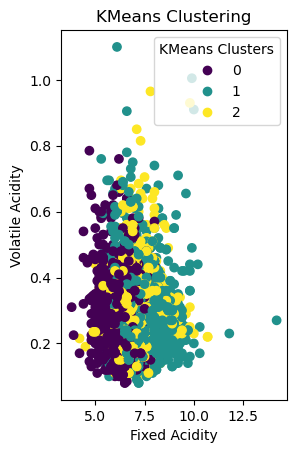

In [15]:
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(data['fixed acidity'], data['volatile acidity'], c=kmeans_clusters)
plt.title('KMeans Clustering')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(handles=scatter1.legend_elements()[0], labels=list(range(len(scatter1.legend_elements()[0]))), title="KMeans Clusters")


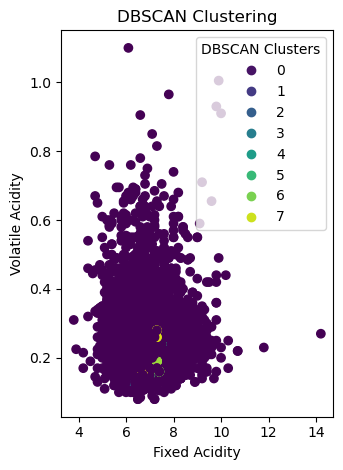

In [16]:
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(data['fixed acidity'], data['volatile acidity'], c=dbscan_clusters)
plt.title('DBSCAN Clustering')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(handles=scatter2.legend_elements()[0], labels=list(range(len(scatter2.legend_elements()[0]))), title="DBSCAN Clusters")

plt.tight_layout()
plt.show()